In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [3]:
df = pd.read_csv('../python_stat_sample-master/data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


In [4]:
# 'quiz' 열과 'final_test' 열의 데이터를 NumPy 배열로 추출합니다.
# 'quiz' 열의 데이터는 변수 x에, 'final_test' 열의 데이터는 변수 y에 저장됩니다.
x = np.array(df['quiz'])
y = np.array(df['final_test'])

# 변수 p에 상수 1을 할당합니다.
# 이 부분은 코드에서 사용되지 않으며, p 변수의 값을 1로 설정하는 역할을 합니다.
p = 1

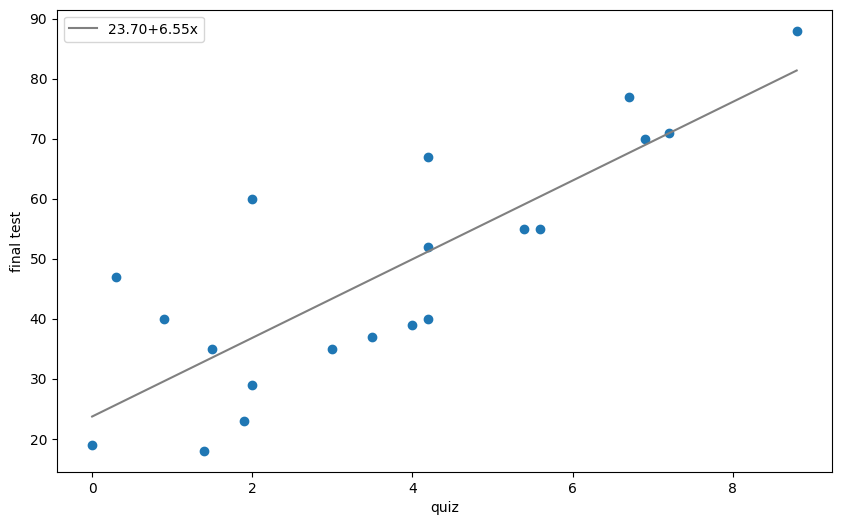

In [5]:
# 선형 회귀를 수행하기 위해 데이터를 준비합니다.

# np.polyfit 함수를 사용하여 x와 y 데이터로부터 선형 회귀 모델의 계수를 추정합니다.
poly_fit = np.polyfit(x, y, 1)

# np.poly1d 함수를 사용하여 추정된 선형 회귀 모델을 생성합니다.
poly_1d = np.poly1d(poly_fit)

# x 데이터의 최솟값부터 최댓값까지 일정 간격으로 값을 생성합니다.
xs = np.linspace(x.min(), x.max())

# 생성된 x 값에 대응하는 y 값을 예측합니다.
ys = poly_1d(xs)

# 그래프를 그리기 위한 플롯을 설정합니다.
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')

# 회귀 직선을 그립니다. 회귀식은 레이블로 표시됩니다.
ax.plot(xs, ys, color='gray',
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 데이터 포인트를 산점도로 나타냅니다.
ax.scatter(x, y)

# 범례를 추가합니다.
ax.legend()

# 그래프를 출력합니다.
plt.show()

In [8]:
# 선형 회귀 모델을 생성하고 결과를 요약합니다.
# 선형 회귀 모델을 정의하는 회귀식을 설정합니다.
formula = 'final_test ~ quiz'

# smf.ols 함수를 사용하여 주어진 데이터 프레임 df을 이용하여 선형 회귀 모델을 생성합니다.
# 생성된 모델을 result에 할당합니다.
result = smf.ols(formula, df).fit()

# 생성된 회귀 모델의 요약 통계 정보를 출력합니다.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           8.59e-06
Time:                        10:56:25   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# 입력 데이터 x로부터 행렬 X를 생성합니다.
# np.ones_like(x)는 x와 동일한 모양(shape)의 배열을 생성하고, 각 원소를 1로 초기화합니다.
# 이 배열은 절편(intercept)에 해당하는 1의 값을 가지고 있습니다.
# x는 입력 데이터로, 'quiz' 열의 값을 나타냅니다.
# 이 두 배열을 수직으로 쌓아서 행렬 X를 생성합니다.
X = np.array([np.ones_like(x), x]).T

# 생성된 행렬 X를 출력합니다.
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [10]:
# 최소 제곱 선형 회귀를 사용하여 회귀 계수를 추정합니다.
# np.linalg.lstsq 함수를 사용하여 X와 y를 이용하여 최소 제곱 선형 회귀를 수행하고
# 회귀 계수 beta0_hat와 beta1_hat를 추정합니다.
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]

# 추정된 회귀 계수 beta0_hat와 beta1_hat를 출력합니다.
beta0_hat, beta1_hat

C:\Users\admin\AppData\Local\Temp\ipykernel_22500\1547428137.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]


(23.699, 6.554)

In [11]:
# 선형 회귀 모델을 이용하여 예측값과 잔차를 계산합니다.

# 예측값(y_hat)은 회귀 모델의 절편 계수(beta0_hat)와 기울기 계수(beta1_hat)를 사용하여 계산됩니다.
# y_hat = beta0_hat + beta1_hat * x
y_hat = beta0_hat + beta1_hat * x

# 잔차(eps_hat)는 실제 종속 변수 값(y)에서 예측값(y_hat)을 뺀 것으로 계산됩니다.
# eps_hat = y - y_hat
eps_hat = y - y_hat

In [12]:
# 회귀 모델의 잔차(오차)에 대한 분산을 계산합니다.

# np.var 함수를 사용하여 잔차(eps_hat)에 대한 분산을 계산합니다.
# ddof 옵션은 자유도 보정(degree of freedom correction)을 나타내며, p+1을 사용합니다.
# p는 회귀 모델의 독립 변수의 수를 나타냅니다.
s_var = np.var(eps_hat, ddof=p+1)

# 계산된 잔차 분산을 출력합니다.
s_var

134.290

In [13]:
# 회귀 모델의 계수에 대한 분산을 계산합니다.

# X 행렬의 전치행렬과 X 행렬의 행렬 곱(dot product)을 계산합니다.
# 이 곱셈 결과는 회귀 모델에서 사용되는 중요한 값 중 하나로, 계수에 대한 분산 계산에 사용됩니다.

# np.linalg.pinv 함수를 사용하여 dot_product의 유사 역행렬(pseudo-inverse)을 계산합니다.
# 유사 역행렬은 행렬이 정방행렬이 아닐 때 사용되며, 회귀 모델의 계수에 대한 분산을 계산하는 데 필요합니다.

# np.diag 함수를 사용하여 유사 역행렬의 대각선 요소를 추출합니다.
# 이 대각선 요소는 계수에 대한 분산을 나타내며, C0와 C1에 각각 할당됩니다.
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [14]:
# 회귀 모델의 계수에 대한 표준 오차를 계산합니다.

# s_var는 잔차(오차)의 분산을 나타내며, C0와 C1은 이전에 계산한 회귀 모델의 계수에 대한 분산입니다.

# 표준 오차는 s_var와 C0를 곱한 값의 제곱근으로 계산됩니다.
# 표준 오차는 s_var와 C1을 곱한 값의 제곱근으로 계산됩니다.
# 계산된 표준 오차를 출력합니다.
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.714, 1.069)

In [15]:
# 회귀 모델의 절편에 대한 신뢰 구간을 계산합니다.

# rv는 t-분포(t-distribution)를 나타내며, 자유도가 n-2인 t-분포를 사용합니다.
# n은 데이터의 샘플 크기를 나타냅니다.

# 절편 beta0_hat에 대한 하한 신뢰 한계(Lower Confidence Limit, LCL)를 계산합니다.
# LCL은 beta0_hat에서 t-분포의 상위 2.5% 지점(0.025 분위수)까지 이동한 값에
# s_var와 C0를 곱한 후 beta0_hat에서 뺀 값입니다.
lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)

# 절편 beta0_hat에 대한 상한 신뢰 한계(Upper Confidence Limit, UCL)를 계산합니다.
# UCL은 beta0_hat에서 t-분포의 하위 2.5% 지점(0.975 분위수)까지 이동한 값에
# s_var와 C0를 곱한 후 beta0_hat에서 뺀 값입니다.
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)

# 계산된 하한 신뢰 한계(LCL)와 상한 신뢰 한계(UCL)를 출력합니다.
lcl, hcl

(13.796, 33.603)

In [17]:
# 회귀 모델의 기울기 계수에 대한 신뢰 구간을 계산합니다.

# rv는 t-분포(t-distribution)를 나타내며, 자유도가 n-2인 t-분포를 사용합니다.
# n은 데이터의 샘플 크기를 나타냅니다.

# 기울기 계수 beta1_hat에 대한 하한 신뢰 한계(Lower Confidence Limit, LCL)를 계산합니다.
# LCL은 beta1_hat에서 t-분포의 상위 2.5% 지점(0.025 분위수)까지 이동한 값에
# s_var와 C1을 곱한 후 beta1_hat에서 뺀 값입니다.
lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)

# 기울기 계수 beta1_hat에 대한 상한 신뢰 한계(Upper Confidence Limit, UCL)를 계산합니다.
# UCL은 beta1_hat에서 t-분포의 하위 2.5% 지점(0.975 분위수)까지 이동한 값에
# s_var와 C1을 곱한 후 beta1_hat에서 뺀 값입니다.
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)

# 계산된 하한 신뢰 한계(LCL)와 상한 신뢰 한계(UCL)를 출력합니다.
lcl, hcl

(4.309, 8.799)

In [18]:
# t-통계량(t-statistic)을 계산합니다.

# beta1_hat는 기울기 계수에 대한 추정치를 나타냅니다.
# s_var는 잔차(오차)의 분산을 나타내며, C1은 이전에 계산한 기울기 계수에 대한 분산입니다.

# t-통계량(t)은 기울기 계수 beta1_hat를 표준 오차로 나눈 값으로 계산됩니다.
# 이 값은 기울기 계수에 대한 가설 검정에서 사용되며, 기울기가 0과 다르다는 가설을 평가하는 데 도움을 줍니다.
t = beta1_hat / np.sqrt(s_var * C1)

# 계산된 t-통계량(t)을 출력합니다.
t

6.133

In [23]:
# t-통계량(t)의 양측 유의확률(p-value)을 계산합니다.

# rv는 t-분포(t-distribution)를 나타내며, 자유도가 n-2인 t-분포를 사용합니다.
# n은 데이터의 샘플 크기를 나타냅니다.

# t-통계량(t)를 이용하여 t-분포의 누적 분포 함수(cumulative distribution function, cdf)를 계산합니다.
# 이때, 양측 검정을 위해 t-통계량(t)의 절댓값을 사용합니다.

# (1 - rv.cdf(t)) * 2는 양측 검정을 위한 양측 유의확률(p-value)을 계산합니다.
# 양측 검정에서는 분포의 양쪽 꼬리에 해당하는 영역을 고려하므로, 양측 유의확률은 두 꼬리의 영역을 합산하여 계산됩니다.

# 계산된 양측 유의확률(p-value)을 반환합니다.
(1 - rv.cdf(t)) * 2

0.000

In [21]:
# t-통계량(t)을 계산합니다.

# beta0_hat는 절편 계수에 대한 추정치를 나타냅니다.
# s_var는 잔차(오차)의 분산을 나타내며, C0은 이전에 계산한 절편 계수에 대한 분산입니다.

# t-통계량(t)는 절편 계수 beta0_hat를 표준 오차로 나눈 값으로 계산됩니다.
t = beta0_hat / np.sqrt(s_var * C0)

# 계산된 t-통계량(t)을 출력합니다.
t

5.028

In [22]:
# t-통계량(t)의 양측 유의확률(p-value)을 계산합니다.

# rv는 t-분포(t-distribution)를 나타내며, 자유도가 n-2인 t-분포를 사용합니다.
# n은 데이터의 샘플 크기를 나타냅니다.

# t-통계량(t)를 이용하여 t-분포의 누적 분포 함수(cumulative distribution function, cdf)를 계산합니다.
# 이때, 양측 검정을 위해 t-통계량(t)의 절댓값을 사용합니다.

# (1 - rv.cdf(t)) * 2는 양측 검정을 위한 양측 유의확률(p-value)을 계산합니다.
# 양측 검정에서는 분포의 양쪽 꼬리에 해당하는 영역을 고려하므로, 양측 유의확률은 두 꼬리의 영역을 합산하여 계산됩니다.

# 계산된 양측 유의확률(p-value)을 반환합니다.
(1 - rv.cdf(t)) * 2

0.000

In [24]:
# 다중 선형 회귀 모델을 위한 formula를 지정합니다.
# 'final_test ~ quiz + sleep_time'는 종속 변수(final_test)와 독립 변수(quiz와 sleep_time) 간의 관계를 나타냅니다.
formula = 'final_test ~ quiz + sleep_time'

# smf.ols 함수를 사용하여 회귀 분석을 수행합니다.
# formula에 지정된 모델을 데이터프레임(df)에 적용하고, fit() 함수를 호출하여 모델을 적합시킵니다.
result = smf.ols(formula, df).fit()

# 회귀 분석 결과를 요약하여 출력합니다.
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           6.19e-06
Time:                        11:05:00   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# 다중 선형 회귀 분석을 위한 독립 변수(x1, x2)와 종속 변수(y)를 설정합니다.

# x1은 독립 변수로서 'quiz' 열의 데이터를 사용합니다.
x1 = df['quiz']

# x2는 독립 변수로서 'sleep_time' 열의 데이터를 사용합니다.
x2 = df['sleep_time']

# y는 종속 변수로서 'final_test' 열의 데이터를 사용합니다.
y = df['final_test']

# p는 회귀 모델에서 사용할 독립 변수(x1, x2)의 개수를 나타냅니다.
# 이 경우, 독립 변수가 두 개이므로 p는 2로 설정됩니다.
p = 2

In [26]:
# 다중 선형 회귀 모델을 위한 설계 행렬 X를 생성합니다.

# X는 다음과 같이 구성됩니다.
# - 첫 번째 열은 1로 초기화된 상수항(intercept)입니다.
# - 두 번째 열은 독립 변수 x1의 값을 가집니다.
# - 세 번째 열은 독립 변수 x2의 값을 가집니다.
X = np.array([np.ones_like(x1), x1, x2]).T

# np.linalg.lstsq 함수를 사용하여 최소 제곱법(Least Squares Method)을 이용하여 회귀 계수를 추정합니다.
# 이 함수는 X와 y를 입력으로 받고, 회귀 계수를 반환합니다.
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]

# 추정된 회귀 계수 beta0_hat, beta1_hat, beta2_hat을 출력합니다.
beta0_hat, beta1_hat, beta2_hat

C:\Users\admin\AppData\Local\Temp\ipykernel_22500\2925482474.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]


(-1.871, 6.429, 4.192)

In [27]:
# 회귀 모델을 사용하여 종속 변수의 예측값(y_hat)을 계산합니다.

# y_hat은 회귀 모델의 예측값으로, 다음과 같이 계산됩니다:
# - beta0_hat: 절편 계수
# - beta1_hat: 독립 변수 x1의 회귀 계수
# - beta2_hat: 독립 변수 x2의 회귀 계수
# - x1: 독립 변수 x1의 값
# - x2: 독립 변수 x2의 값
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2

# 잔차(Residuals)를 계산합니다.
# 잔차는 실제 종속 변수 값(y)과 예측값(y_hat)의 차이로 정의됩니다.
eps_hat = y - y_hat

In [28]:
# 회귀 모델의 잔차의 분산(s_var)을 계산합니다.

# s_var은 잔차(eps_hat)의 제곱을 모두 더한 값에 (n - p - 1)로 나눈 값으로 계산됩니다.
# - n: 데이터 샘플의 수
# - p: 모델에서 사용된 독립 변수의 수
s_var = np.sum(eps_hat ** 2) / (n - p - 1)

# 회귀 계수의 분산을 계산합니다.

# np.diag 함수는 대각행렬(diagonal matrix)에서 대각원소(diagonal elements)를 추출합니다.
# np.linalg.pinv 함수는 행렬의 유사 역행렬(pseudo-inverse)을 계산합니다.
# np.dot(X.T, X)는 X의 전치행렬과 X의 행렬 곱셈을 나타냅니다.
# 이를 통해 X의 적합 행렬(fit matrix)을 계산합니다.

# C0, C1, C2는 각각 회귀 모델의 절편(b0) 및 독립 변수 x1, x2의 회귀 계수(b1, b2)의 분산을 나타냅니다.
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [29]:
# t-분포(t-distribution)를 생성합니다.

# rv는 t-분포(t-distribution)를 나타내며, 자유도(degree of freedom)가 (n - p - 1)인 t-분포를 사용합니다.
# n: 데이터 샘플의 수
# p: 모델에서 사용된 독립 변수의 수
rv = stats.t(n - p - 1)

# 신뢰 구간(confidence interval)을 계산합니다.

# lcl은 lower confidence limit의 약자로, beta2_hat(회귀 계수)의 신뢰 구간의 하한(lower bound)을 계산합니다.
# - rv.isf(0.025): t-분포에서 0.025(알파/2)에 해당하는 양측 임계값을 계산합니다.
# - np.sqrt(s_var * C2): 회귀 계수의 분산에 대한 제곱근을 계산합니다.
lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)

# hcl은 upper confidence limit의 약자로, beta2_hat(회귀 계수)의 신뢰 구간의 상한(upper bound)을 계산합니다.
# - rv.isf(0.975): t-분포에서 0.975(1 - 알파/2)에 해당하는 양측 임계값을 계산합니다.
# - np.sqrt(s_var * C2): 회귀 계수의 분산에 대한 제곱근을 계산합니다.
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)

# 계산된 하한(lcl)과 상한(hcl)을 출력합니다.
lcl, hcl

(0.440, 7.943)

In [31]:
# 다중 선형 회귀 모델을 위한 회귀식(formula)을 정의합니다.

# formula는 종속 변수 'final_test'와 독립 변수 'quiz', 'sleep_time', 'school_method' 간의 관계를 나타냅니다.
formula = 'final_test ~ quiz + sleep_time + school_method'

# smf.ols 함수를 사용하여 회귀 모델을 적합(fit)합니다.
# - formula: 회귀식
# - df: 데이터 프레임
result = smf.ols(formula, df).fit()

# 적합한 회귀 모델의 결과를 출력합니다.
# result.summary()는 회귀 분석 결과에 대한 자세한 통계 정보를 요약하여 보여줍니다.
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           7.47e-05
Time:                        11:09:59   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.33

In [33]:
# 독립 변수 'quiz'와 종속 변수 'final_test'를 numpy 배열로 변환합니다.
x = np.array(df['quiz'])
y = np.array(df['final_test'])

# 단순 선형 회귀 모델에서 사용할 독립 변수의 수를 지정합니다.
# 여기서는 단순 선형 회귀이므로 독립 변수가 1개입니다.
p = 1

# 단순 선형 회귀 모델을 위한 회귀식(formula)을 정의합니다.
# 'final_test ~ quiz'는 종속 변수 'final_test'와 독립 변수 'quiz' 간의 관계를 나타냅니다.
formula = 'final_test ~ quiz'

# smf.ols 함수를 사용하여 단순 선형 회귀 모델을 적합(fit)합니다.
# - formula: 회귀식
# - df: 데이터 프레임
result = smf.ols(formula, df).fit()

# 적합한 단순 선형 회귀 모델의 결과를 출력합니다.
# result.summary()는 회귀 분석 결과에 대한 자세한 통계 정보를 요약하여 보여줍니다.
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           8.59e-06
Time:                        11:11:16   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.0

In [34]:
# result는 이미 이전에 적합한 회귀 모델의 결과를 저장한 객체입니다.

# np.array(result.fittedvalues)는 회귀 모델에 의한 적합값(예측값)을 numpy 배열로 변환합니다.
# fittedvalues 속성은 모델에 의한 예측값을 나타내며, 이 값들은 독립 변수에 대한 종속 변수의 예상값입니다.
y_hat = np.array(result.fittedvalues)

# y_hat은 회귀 모델에 의한 종속 변수의 예상값을 담고 있는 numpy 배열입니다.
# 이 예상값은 주어진 독립 변수를 사용하여 모델이 예측한 종속 변수의 값들입니다.
y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

In [35]:
# result는 이미 이전에 적합한 회귀 모델의 결과를 저장한 객체입니다.

# np.array(result.resid)는 회귀 모델의 잔차(오차)를 numpy 배열로 변환합니다.
# resid 속성은 모델의 예측값과 실제 종속 변수 값 사이의 차이를 나타내며, 이 값들은 모델의 오차입니다.
eps_hat = np.array(result.resid)

# eps_hat은 회귀 모델의 잔차(오차)를 담고 있는 numpy 배열입니다.
# 이 잔차는 회귀 모델이 종속 변수를 얼마나 잘 설명하지 못했는지를 나타내며, 모델의 예측과 실제 데이터 간의 차이를 표현합니다.
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

In [36]:
# eps_hat은 이미 이전에 계산한 회귀 모델의 잔차(오차)를 담고 있는 numpy 배열입니다.

# np.sum(eps_hat ** 2)는 회귀 모델의 잔차(오차) 제곱의 합을 계산합니다.
# 이를 통해 회귀 모델이 실제 데이터와 얼마나 차이가 있는지를 나타내는 잔차 제곱합을 계산합니다.
# 잔차 제곱합은 모델의 적합도를 평가하고, 모델이 데이터를 얼마나 잘 설명하는지를 측정하는데 사용됩니다.
np.sum(eps_hat ** 2)

2417.228

In [37]:
# total_var는 종속 변수 y의 전체 분산을 계산합니다.
# y의 전체 분산은 데이터 포인트들이 종속 변수의 평균으로부터 얼마나 퍼져 있는지를 나타냅니다.
total_var = np.sum((y - np.mean(y))**2)

# y_hat은 이미 이전에 계산한 회귀 모델의 예상값(적합값)을 담고 있는 numpy 배열입니다.
# exp_var는 회귀 모델에 의한 종속 변수 예측값의 분산을 계산합니다.
# 회귀 모델의 예측값의 분산은 모델이 데이터의 변동을 얼마나 잘 설명하는지를 나타냅니다.
exp_var = np.sum((y_hat - np.mean(y))**2)

# eps_hat은 이미 이전에 계산한 회귀 모델의 잔차(오차)를 담고 있는 numpy 배열입니다.
# unexp_var는 회귀 모델의 잔차의 분산을 계산합니다.
# 잔차의 분산은 모델이 설명하지 못한 데이터의 변동을 나타냅니다.
unexp_var = np.sum(eps_hat ** 2)

# total_var, exp_var, unexp_var는 각각 종속 변수의 전체 분산, 회귀 모델의 예측값의 분산, 잔차의 분산을 나타내는 값들입니다.

In [38]:
# total_var, exp_var, unexp_var는 종속 변수의 전체 분산, 회귀 모델의 예측값의 분산, 잔차의 분산을 각각 나타내는 값입니다.

# total_var은 종속 변수의 전체 분산을 나타내고,
# exp_var은 모델이 설명한 종속 변수의 분산,
# unexp_var은 모델이 설명하지 못한 종속 변수의 분산을 나타냅니다.

# total_var을 exp_var와 unexp_var로 분해하고, 이 두 분산을 합산하여 종속 변수의 전체 분산을 계산합니다.
# 이를 통해 회귀 모델의 설명력과 잔차의 크기를 비교할 수 있습니다.
total_var, exp_var + unexp_var

(7468.550, 7468.550)

In [39]:
# exp_var는 회귀 모델에 의해 설명된 종속 변수 예측값의 분산을 나타냅니다.
# 이 분산은 모델이 데이터의 변동을 얼마나 잘 설명하는지를 나타냅니다.

# total_var는 종속 변수 y의 전체 분산을 나타냅니다.
# y의 전체 분산은 데이터 포인트들이 종속 변수의 평균으로부터 얼마나 퍼져 있는지를 나타냅니다.

# exp_var와 total_var를 사용하여 모델의 설명력을 계산합니다.
# 모델의 설명력은 exp_var를 total_var로 나눈 값으로, 종속 변수의 분산 중에서 모델이 설명한 비율을 나타냅니다.
# 이 값이 1에 가까울수록 모델이 데이터를 잘 설명하고 있는 것을 의미합니다.
# 설명력은 모델의 예측 능력을 평가하는 중요한 지표 중 하나입니다.
exp_var / total_var

0.676

In [40]:
# 상관 계수를 제곱하여 설명력을 계산합니다.
# 상관 계수의 제곱은 변수 x와 y 사이의 관계를 설명하는 정도를 나타내는 값입니다.
# 이 값이 0에서 1 사이의 범위에 있으며, 1에 가까울수록 두 변수 간의 강한 선형 관계를 나타냅니다.
np.corrcoef(x, y)[0, 1] ** 2

0.676

In [41]:
# 설명력을 계산합니다.
# 설명력은 모델이 종속 변수의 분산을 얼마나 잘 설명하는지를 나타내는 지표입니다.
# 높은 설명력은 모델이 종속 변수의 변동을 크게 설명한다는 것을 의미합니다.
# (unexp_var / (n - p - 1)) / (total_var / (n - 1))는 설명력을 계산하는 공식입니다.
# 이 값이 1에 가까울수록 모델이 데이터를 잘 설명하고 있는 것을 나타냅니다.
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.658

In [42]:
# F-통계량은 모델의 설명 변수의 유의성을 평가하기 위해 설명 변수로 설명되는 분산과
# 모델의 예측 오차의 분산을 비교하는 지표입니다.
# (exp_var / p) / (unexp_var / (n - p - 1))은 F-통계량을 계산하는 공식입니다.
# F-통계량은 설명 변수가 종속 변수를 얼마나 잘 설명하는지를 나타내며,
# 높은 F-통계량 값은 설명 변수가 유의하게 영향을 미치는 것을 나타냅니다.
f = (exp_var / p) / (unexp_var / (n - p - 1))
f

37.615

In [43]:
# F-분포는 모델의 설명 변수(독립 변수)의 유의성을 평가하는 데 사용되며,
# p는 설명 변수의 개수, n은 데이터의 샘플 크기를 나타냅니다.
# rv는 F-분포를 나타내며, 자유도가 p와 n-p-1인 F-분포를 사용합니다.
rv = stats.f(p, n-p-1)

# F-통계량(f_statistic)을 이용하여 F-분포의 누적 분포 함수(cumulative distribution function, cdf)를 계산합니다.
# 이때, 1 - rv.cdf(f)는 F-분포의 오른쪽 꼬리 영역에 해당하는 p-value를 계산합니다.
# 1 - rv.cdf(f)는 설명 변수가 종속 변수에 유의미한 영향을 미치는지를 나타내며, 작을수록 유의미한 영향을 나타냅니다.
1 - rv.cdf(f)

0.000

In [45]:
# prob는 동전의 앞면이 나올 확률을 나타냅니다.
# coin_result는 동전 던지기의 결과를 나타내는 리스트로, 0은 뒷면, 1은 앞면을 나타냅니다.
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

# rv는 베르누이 분포를 나타내며, 주어진 확률(prob)로 앞면이 나올 확률을 가집니다.
rv = stats.bernoulli(prob)

# 베르누이 분포의 확률 질량 함수(probability mass function, pmf)를 이용하여
# 주어진 동전 던지기 결과(coin_result)의 가능도(likelihood)를 계산합니다.
# np.prod() 함수는 주어진 리스트의 원소들을 모두 곱하는 역할을 합니다.
L = np.prod(rv.pmf(coin_result))

# L은 동전 던지기 결과의 가능도를 나타내며, 주어진 확률 분포 하에서 주어진 결과가 나올 확률을 나타냅니다.
L

0.031

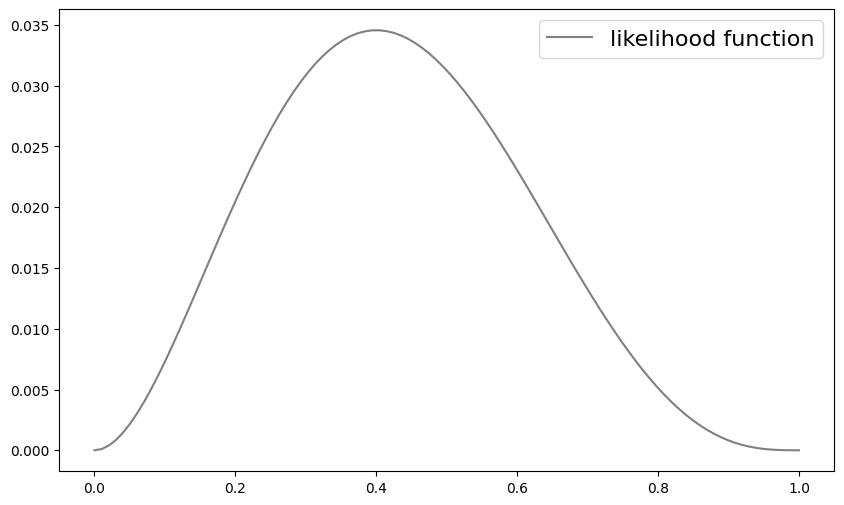

In [46]:
# ps는 확률(probability)의 범위를 0부터 1까지 100개의 등간격으로 나눈 배열입니다.
# 이 배열은 가능한 앞면이 나올 확률의 후보들을 나타냅니다.
ps = np.linspace(0, 1, 100)

# Ls는 각 확률 후보(ps)에 대한 가능도(likelihood)를 계산하여 리스트로 저장하는 부분입니다.
# 리스트 컴프리헨션을 사용하여 각 확률 후보에 대한 가능도를 계산합니다.
# stats.bernoulli(prob).pmf(coin_result)는 주어진 확률(prob)로 주어진 동전 던지기 결과(coin_result)의 가능도를 계산합니다.
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result)) for prob in ps]

# 가능도 함수를 시각화하기 위해 그래프를 그립니다.
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# ps와 Ls를 이용하여 가능도 함수(likelihood function)를 그래프로 표현합니다.
ax.plot(ps, Ls, label='likelihood function', color='gray')

# 그래프에 범례(legend)를 추가합니다.
ax.legend(fontsize=16)

# 그래프를 화면에 출력합니다.
plt.show()

In [47]:
# prob는 동전의 앞면이 나올 확률을 나타내는 변수입니다.
prob = 0.4

# stats.bernoulli(prob)은 주어진 확률(prob)로 모델링된 베르누이 분포를 생성합니다.
rv = stats.bernoulli(prob)

# 동전 던지기 결과를 나타내는 리스트 [0, 1, 0, 0, 1]를 주어진 확률(prob)로 모델링한 베르누이 분포의
# 확률 질량 함수(PMF)에 대한 로그 값을 계산합니다.
# np.log(rv.pmf([0, 1, 0, 0, 1]))는 각 동전 던지기 결과에 대한 확률의 로그 값을 계산하고,
# 그 값을 모두 합산하여 최대 로그 가능도(Maximum Log-Likelihood)를 계산합니다.
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))

# 계산된 최대 로그 가능도를 mll 변수에 저장합니다.
mll

-3.365

In [48]:
# y_hat은 모델에서 예측한 종속 변수(y)의 예측값입니다.
# unexp_var는 모델에서 설명하지 못하는 (잔차) 분산입니다.
# n은 샘플의 크기를 나타냅니다.
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))

# stats.norm(y_hat, np.sqrt(unexp_var / n))는 주어진 평균(y_hat)과 표준편차(잔차의 표준편차)로
# 모델링된 정규 분포를 생성합니다. 이 분포를 사용하여 종속 변수(y)의 확률 밀도 함수(PDF) 값을 계산합니다.

# 각 관측값(y)에 대한 확률 밀도 함수(PDF) 값을 계산하고, 그 값을 모두 합산하여 최대 로그 가능도(Maximum Log-Likelihood)를 계산합니다.
# 최대 로그 가능도는 확률 분포 모델의 파라미터(여기서는 평균과 표준편차)에 대한 데이터의 적합성을 나타내는 지표입니다.
mll = np.sum(np.log(rv.pdf(y)))

# 계산된 최대 로그 가능도를 mll 변수에 저장합니다.
mll

-76.325

In [49]:
# AIC 계산을 위한 공식입니다. AIC는 다음과 같이 계산됩니다:
# AIC = -2 * 최대 로그 가능도(Maximum Log-Likelihood) + 2 * (모델의 파라미터 수 + 1)
# 여기서 최대 로그 가능도인 mll은 이전 코드에서 계산한 값입니다.
# 모델의 파라미터 수인 p는 모델에서 사용된 독립 변수의 개수에 1을 더한 값입니다.
# 1을 더한 이유는 모델의 절편(intercept) 파라미터를 고려하기 위함입니다.

# AIC를 계산합니다.
aic = -2 * mll + 2 * (p + 1)

# 계산된 AIC 값을 aic 변수에 저장합니다.
aic

156.650

In [50]:
# BIC 계산을 위한 공식입니다. BIC는 다음과 같이 계산됩니다:
# BIC = -2 * 최대 로그 가능도(Maximum Log-Likelihood) + ln(n) * (모델의 파라미터 수 + 1)
# 여기서 최대 로그 가능도인 mll은 이전 코드에서 계산한 값입니다.
# 모델의 파라미터 수인 p는 모델에서 사용된 독립 변수의 개수에 1을 더한 값입니다.
# 1을 더한 이유는 모델의 절편(intercept) 파라미터를 고려하기 위함입니다.
# ln(n)은 데이터 포인트의 수 n의 자연로그(로그의 밑이 e인 로그)를 나타냅니다.

# BIC를 계산합니다.
bic = -2 * mll + np.log(n) * (p + 1)

# 계산된 BIC 값을 bic 변수에 저장합니다.
bic

158.642

In [51]:
# 선형 회귀 모델을 생성하고 피팅하는 과정입니다.
# formula 변수에 'final_test ~ quiz + sleep_time'와 같은 형식으로 종속 변수와 독립 변수를 지정합니다.
# 종속 변수인 'final_test'와 독립 변수로 'quiz'와 'sleep_time'을 사용하고 있습니다.
formula = 'final_test ~ quiz + sleep_time'

# smf.ols 함수를 사용하여 선형 회귀 모델을 생성하고 데이터프레임(df)에 대해 피팅합니다.
result = smf.ols(formula, df).fit()

# 피팅된 모델의 요약 통계 정보를 출력합니다.
result_summary = result.summary()

# result_summary에는 회귀 모델에 대한 다양한 통계 정보가 포함되어 있습니다.
# 이 정보에는 회귀 계수, R-squared 값, F-statistic, p-value 등이 포함됩니다.
# 이 정보를 통해 모델의 적합도와 독립 변수의 중요성을 평가할 수 있습니다.

# 결과를 출력합니다.
print(result_summary)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           6.19e-06
Time:                        11:24:30   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# result.resid는 선형 회귀 모델에서 계산된 잔차(에러)를 가져오는 속성입니다.
# 이 코드는 result 객체의 resid 속성을 사용하여 잔차를 가져와서 numpy 배열로 변환합니다.
eps_hat = np.array(result.resid)

# 잔차(에러)는 실제 관측값과 모델이 예측한 값을 뺀 값으로, 각 관측값마다의 모델의 예측 오차를 나타냅니다.
# 이러한 잔차를 분석하여 모델의 적합성을 평가하거나, 이상치를 감지하는 데 사용될 수 있습니다.
# 잔차가 작으면 모델이 관측 데이터를 잘 설명하고 있다는 의미이며, 잔차가 크면 모델의 예측이 부정확하다는 의미일 수 있습니다.

In [53]:
# stats.skew() 함수는 주어진 데이터의 왜도(Skewness)를 계산하는 함수입니다.
# 왜도는 데이터 분포의 비대칭성을 측정하는 지표로, 데이터가 어느 한 쪽으로 치우쳐져 있는 정도를 나타냅니다.
# 왜도가 0인 경우 데이터 분포가 대칭적이며, 왜도가 양수인 경우 오른쪽으로 긴 꼬리를 갖고, 음수인 경우 왼쪽으로 긴 꼬리를 갖습니다.

# eps_hat은 선형 회귀 모델의 잔차(에러)를 나타내는 변수입니다.
# 따라서 이 코드는 잔차의 왜도를 계산하여 반환합니다.

# 왜도는 데이터의 분포 특성을 파악하는 데 도움이 되며, 데이터 분석과 모델 평가에 활용될 수 있습니다.
stats.skew(eps_hat)

0.660

In [54]:
# stats.kurtosis() 함수는 주어진 데이터의 첨도(Kurtosis)를 계산하는 함수입니다.
# 첨도는 데이터 분포의 뾰족한 정도를 측정하는 지표로, 데이터의 분포가 뾰족한 정도나 꼬리의 두께를 나타냅니다.
# fisher 매개변수를 False로 설정하면 첨도 계산 시 피셔 첨도(Fisher Kurtosis)를 사용하지 않고 일반적인 첨도를 계산합니다.
# 피셔 첨도를 사용하지 않는 경우, 정규 분포의 첨도는 3에 가까우며, 이 값을 기준으로 데이터의 첨도를 비교합니다.
# fisher 매개변수를 True로 설정하면 피셔 첨도를 계산하며, 정규 분포의 첨도는 0에 가깝게 나타납니다.

# eps_hat은 선형 회귀 모델의 잔차(에러)를 나타내는 변수입니다.
# 따라서 이 코드는 잔차의 첨도를 계산하고, fisher 매개변수가 False로 설정되어 있으므로 피셔 첨도가 아닌 일반적인 첨도를 반환합니다.

# 첨도는 데이터 분포의 모양을 더 자세하게 분석하는 데 활용되며, 데이터의 분포 특성을 파악하는 데 도움이 됩니다.
stats.kurtosis(eps_hat, fisher=False)

2.437

In [55]:
# np.diff() 함수는 배열에서 차분(연속된 두 값의 차이)을 계산하는 함수입니다.
# eps_hat은 선형 회귀 모델의 잔차(에러)를 나타내는 배열이며, 이 코드에서는 잔차의 1차 차분을 계산합니다.
# 1차 차분은 현재 값과 바로 이전 값의 차이를 계산하여 배열로 반환합니다.

# 이후 np.sum() 함수를 사용하여 1차 차분 배열의 제곱값의 합을 계산합니다.
# 이 값은 1차 차분된 잔차의 변동성을 나타냅니다.

# np.sum(eps_hat ** 2)은 잔차 배열의 제곱값의 합을 계산하며, 이 값은 잔차의 총 변동성을 나타냅니다.

# 따라서 이 코드는 잔차의 1차 차분을 잔차의 총 변동성으로 나눈 비율을 계산하고, 
# 이를 통해 1차 차분된 잔차의 변동성이 전체 변동성에 대비하여 어느 정도인지를 파악합니다.
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

1.508

In [56]:
# 데이터프레임(df)에 'mid_test' 열을 추가합니다.
# 'mid_test' 열은 'quiz' 열의 값을 2배하여 생성됩니다.
df['mid_test'] = df['quiz'] * 2

# 데이터프레임의 처음 5개 행을 출력합니다.
# 이를 통해 'mid_test' 열이 새로 추가된 것을 확인할 수 있습니다.
df.head()

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4
1,7.2,71,7.9,bicycle,14.4
2,0.0,19,5.3,bus,0.0
3,3.0,35,6.8,walk,6.0
4,1.5,35,7.5,walk,3.0


In [57]:
# 새로운 'mid_test' 열을 추가한 후, 선형 회귀 모델을 만들기 위한 formula를 정의합니다.
# 'final_test'를 'quiz'와 'mid_test'의 선형 조합으로 예측하는 모델을 만듭니다.

# smf.ols() 함수를 사용하여 선형 회귀 모델을 만들고, fit() 함수로 모델을 훈련합니다.
# 이 모델을 result 변수에 저장합니다.

# result.summary() 함수를 사용하여 선형 회귀 모델의 요약 정보를 출력합니다.
# 이 정보에는 회귀 계수, t-통계량, p-value, R-squared 등이 포함됩니다.
formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           8.59e-06
Time:                        11:26:50   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           1.3107      0.214      6.133      0.000       0.862       1.760
mid_test       2.6215      0.427      6.133      0.000       1.723       3.519
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                     1.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""